In [71]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


In [72]:
# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [73]:
# Define the fashion categories
categories = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}



In [74]:
# Normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0



In [75]:
# Reshape images to 4D tensors
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))



In [76]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [77]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [78]:

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))



Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4649 - accuracy: 0.8323 - val_loss: 0.3723 - val_accuracy: 0.8630
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3104 - accuracy: 0.8876 - val_loss: 0.3072 - val_accuracy: 0.8890
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2644 - accuracy: 0.9033 - val_loss: 0.2855 - val_accuracy: 0.8944
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2343 - accuracy: 0.9140 - val_loss: 0.2897 - val_accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2136 - accuracy: 0.9210 - val_loss: 0.2674 - val_accuracy: 0.9045
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1914 - accuracy: 0.9289 - val_loss: 0.2696 - val_accuracy: 0.9039
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1747 - accuracy: 0.9347 - val_loss: 0.2576 -

In [79]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 2s - loss: 0.2677 - accuracy: 0.9080 - 2s/epoch - 6ms/step
Test accuracy: 0.9079999923706055


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Flatten the image data
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Train the model
clf.fit(train_images_flat, train_labels)

# Make predictions on the test set
predictions = clf.predict(test_images_flat)

# Define the category names
category_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Evaluate the model for each category
categories = np.unique(train_labels)
overall_predictions = []
overall_labels = []

for category in categories:
    category_indices = np.where(test_labels == category)[0]
    category_predictions = predictions[category_indices]

    overall_predictions.extend(category_predictions)
    overall_labels.extend(test_labels[category_indices])

    category_accuracy = accuracy_score(test_labels[category_indices], category_predictions)
    category_precision = precision_score(test_labels[category_indices], category_predictions, average='macro')
    category_recall = recall_score(test_labels[category_indices], category_predictions, average='macro')
    category_f1 = f1_score(test_labels[category_indices], category_predictions, average='macro')

    category_name = category_names[category]
    print(f"Category: {category_name}")
    print(f"Accuracy: {category_accuracy}")
    print(f"Precision: {category_precision}")
    print(f"Recall: {category_recall}")
    print(f"F1 score: {category_f1}")
    print()

# Compute overall evaluation metrics
overall_accuracy = accuracy_score(overall_labels, overall_predictions)
overall_precision = precision_score(overall_labels, overall_predictions, average='macro')
overall_recall = recall_score(overall_labels, overall_predictions, average='macro')
overall_f1 = f1_score(overall_labels, overall_predictions, average='macro')

print("Overall Evaluation")
print(f"Accuracy: {overall_accuracy}")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"F1 score: {overall_f1}")


Category: T-shirt/top
Accuracy: 0.739
Precision: 0.1111111111111111
Recall: 0.08211111111111111
F1 score: 0.09443486039230721

Category: Trouser
Accuracy: 0.953
Precision: 0.125
Recall: 0.119125
F1 score: 0.12199180747567845

Category: Pullover
Accuracy: 0.646
Precision: 0.1111111111111111
Recall: 0.07177777777777777
F1 score: 0.08721479681382477

Category: Dress
Accuracy: 0.787
Precision: 0.1
Recall: 0.0787
F1 score: 0.08808058198097371

Category: Coat
Accuracy: 0.65
Precision: 0.14285714285714285
Recall: 0.09285714285714286
F1 score: 0.11255411255411256

Category: Sandal
Accuracy: 0.886
Precision: 0.14285714285714285
Recall: 0.12657142857142858
F1 score: 0.13422208756249052

Category: Shirt
Accuracy: 0.558
Precision: 0.1111111111111111
Recall: 0.062000000000000006
F1 score: 0.07958921694480103

Category: Sneaker
Accuracy: 0.882
Precision: 0.2
Recall: 0.1764
F1 score: 0.18746014877789585

Category: Bag
Accuracy: 0.915
Precision: 0.1
Recall: 0.0915
F1 score: 0.09556135770234987

Catego

C:\Users\ASUS\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defi

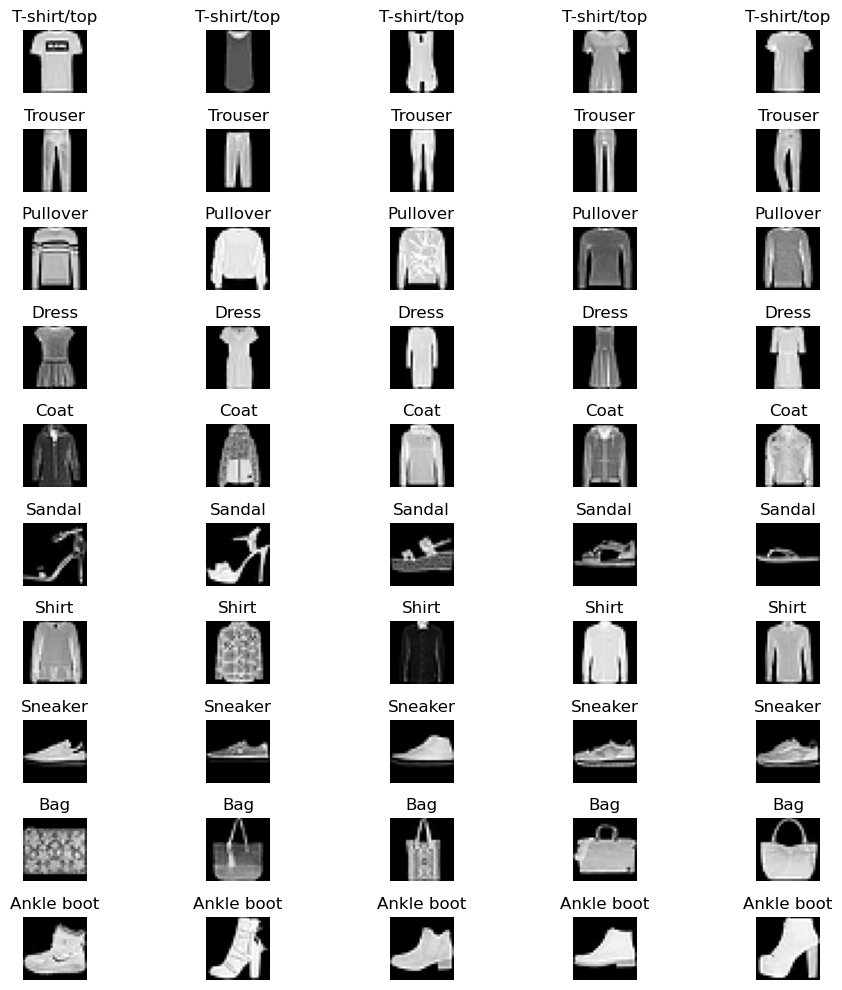

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Define class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Display images for each category
num_categories = len(class_labels)
num_images_per_category = 5

plt.figure(figsize=(10, 10))

for category in range(num_categories):
    category_images = train_images[train_labels == category][:num_images_per_category]
    category_labels = [class_labels[category]] * num_images_per_category

    for i, image in enumerate(category_images):
        plt.subplot(num_categories, num_images_per_category, (category * num_images_per_category) + i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(category_labels[i])

plt.tight_layout()
plt.show()
